In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tiktok-google-play-store-review/tiktok_google_play_reviews.csv


In [2]:
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/tiktok-google-play-store-review/tiktok_google_play_reviews.csv')
df.shape

/tmp/ipykernel_20/447599479.py:2: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/tiktok-google-play-store-review/tiktok_google_play_reviews.csv')


(460287, 10)

In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460287 entries, 0 to 460286
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              460287 non-null  object
 1   userName              460287 non-null  object
 2   userImage             460287 non-null  object
 3   content               460271 non-null  object
 4   score                 460287 non-null  int64 
 5   thumbsUpCount         460287 non-null  int64 
 6   reviewCreatedVersion  333953 non-null  object
 7   at                    460287 non-null  object
 8   replyContent          260 non-null     object
 9   repliedAt             260 non-null     object
dtypes: int64(2), object(8)
memory usage: 35.1+ MB


In [5]:
df.describe()

,score,thumbsUpCount
count,460287.000000,460287.000000
mean,4.234919,3.210601
std,1.430718,183.506791
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,40311.000000


In [6]:
df.isnull().sum()

reviewId                     0
userName                     0
userImage                    0
content                     16
score                        0
thumbsUpCount                0
reviewCreatedVersion    126334
at                           0
replyContent            460027
repliedAt               460027
dtype: int64

In [7]:
df['repliedAt'].dtypes

dtype('O')

In [8]:
df.duplicated().sum()

0

In [9]:
df['thumbsUpCount'].value_counts()

0       435657
1        16630
2         2322
3          924
4          551
         ...  
437          1
4299         1
2780         1
1564         1
9511         1
Name: thumbsUpCount, Length: 692, dtype: int64

In [10]:
counts = df['userName'].value_counts()

In [11]:
counts.head(30)

A Google user    1207
Ali Raza          221
Khan Khan         220
Ali Khan          147
Ali Hassan        136
Salman Khan       121
Abdul Rehman      118
Imran Khan        114
Md Rakib          111
Mehedi Hasan      104
Bilal Khan        102
Hamza Khan         98
Asif Khan          96
Ali Ali            93
Muhammad Ali       90
Abdullah Khan      90
Md Hasan           86
Usman Khan         86
Md Emon            80
Asad Ali           80
Md Arif            77
Md Alamin          75
Amir Khan          74
Ahmad Khan         73
Haider Ali         73
Md Rasel           70
Saiful Islam       70
Hassan Ali         69
Md Sumon           68
Adnan Khan         66
Name: userName, dtype: int64

In [12]:
df['Date'] = pd.to_datetime(df["at"]).dt.date

In [13]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Date
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN,2022-11-29
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN,2022-11-29
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN,2022-11-29
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN,2022-11-29
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN,2022-11-29
...,...,...,...,...,...,...,...,...,...,...,...
460282,73cf78fe-599d-4488-8a8b-ae443847303b,hera killar,https://play-lh.googleusercontent.com/a-/ACNPE...,😍😍,5,0,NaN,2022-06-18 12:35:32,NaN,NaN,2022-06-18
460283,16d331c8-ba21-4aeb-ac01-dec455ca48ad,Hiox Softwares,https://play-lh.googleusercontent.com/a/ALm5wu...,Very nice,1,0,NaN,2022-06-18 12:35:25,NaN,NaN,2022-06-18
460284,fbb86777-b885-4f76-b49e-13e424aa5afc,Md. Zahid Hasan,https://play-lh.googleusercontent.com/a-/ACNPE...,Nice,5,0,24.8.3,2022-06-18 12:34:39,NaN,NaN,2022-06-18
460285,28df682c-bb17-4224-8658-642a92a2c723,Ash Ryan,https://play-lh.googleusercontent.com/a-/ACNPE...,TikTok love your sad,5,0,NaN,2022-06-18 12:34:38,NaN,NaN,2022-06-18


In [14]:
df1 = df[['userName','content','score','thumbsUpCount','Date']]
df1.head()

,userName,content,score,thumbsUpCount,Date
0,Cassie Moore,No words,5,0,2022-11-29
1,Kaleb Plummer,Great fun app so far!,5,0,2022-11-29
2,Rylee Maher,The app would get a higher rating but I litera...,1,0,2022-11-29
3,Kittykatelyn Romilly,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,2022-11-29
4,Loveness Malenga,Pictures and record,5,0,2022-11-29


In [15]:
df1.isnull().sum()

userName          0
content          16
score             0
thumbsUpCount     0
Date              0
dtype: int64

In [16]:
df1 = df1.dropna()
df1.isnull().sum()

userName         0
content          0
score            0
thumbsUpCount    0
Date             0
dtype: int64

In [17]:
# df1 = df1.drop(['Date_count'],axis=1)
df1.head()


,userName,content,score,thumbsUpCount,Date
0,Cassie Moore,No words,5,0,2022-11-29
1,Kaleb Plummer,Great fun app so far!,5,0,2022-11-29
2,Rylee Maher,The app would get a higher rating but I litera...,1,0,2022-11-29
3,Kittykatelyn Romilly,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,2022-11-29
4,Loveness Malenga,Pictures and record,5,0,2022-11-29


In [18]:
print(df1['Date'].min())
print(df1['Date'].max())

2022-06-18
2022-11-29


# For June

(array([4976., 3081., 3421., 3318., 3252., 6232., 3182., 3001., 3175.,
        6756.]),
 array([19161. , 19162.2, 19163.4, 19164.6, 19165.8, 19167. , 19168.2,
        19169.4, 19170.6, 19171.8, 19173. ]),
 <BarContainer object of 10 artists>)

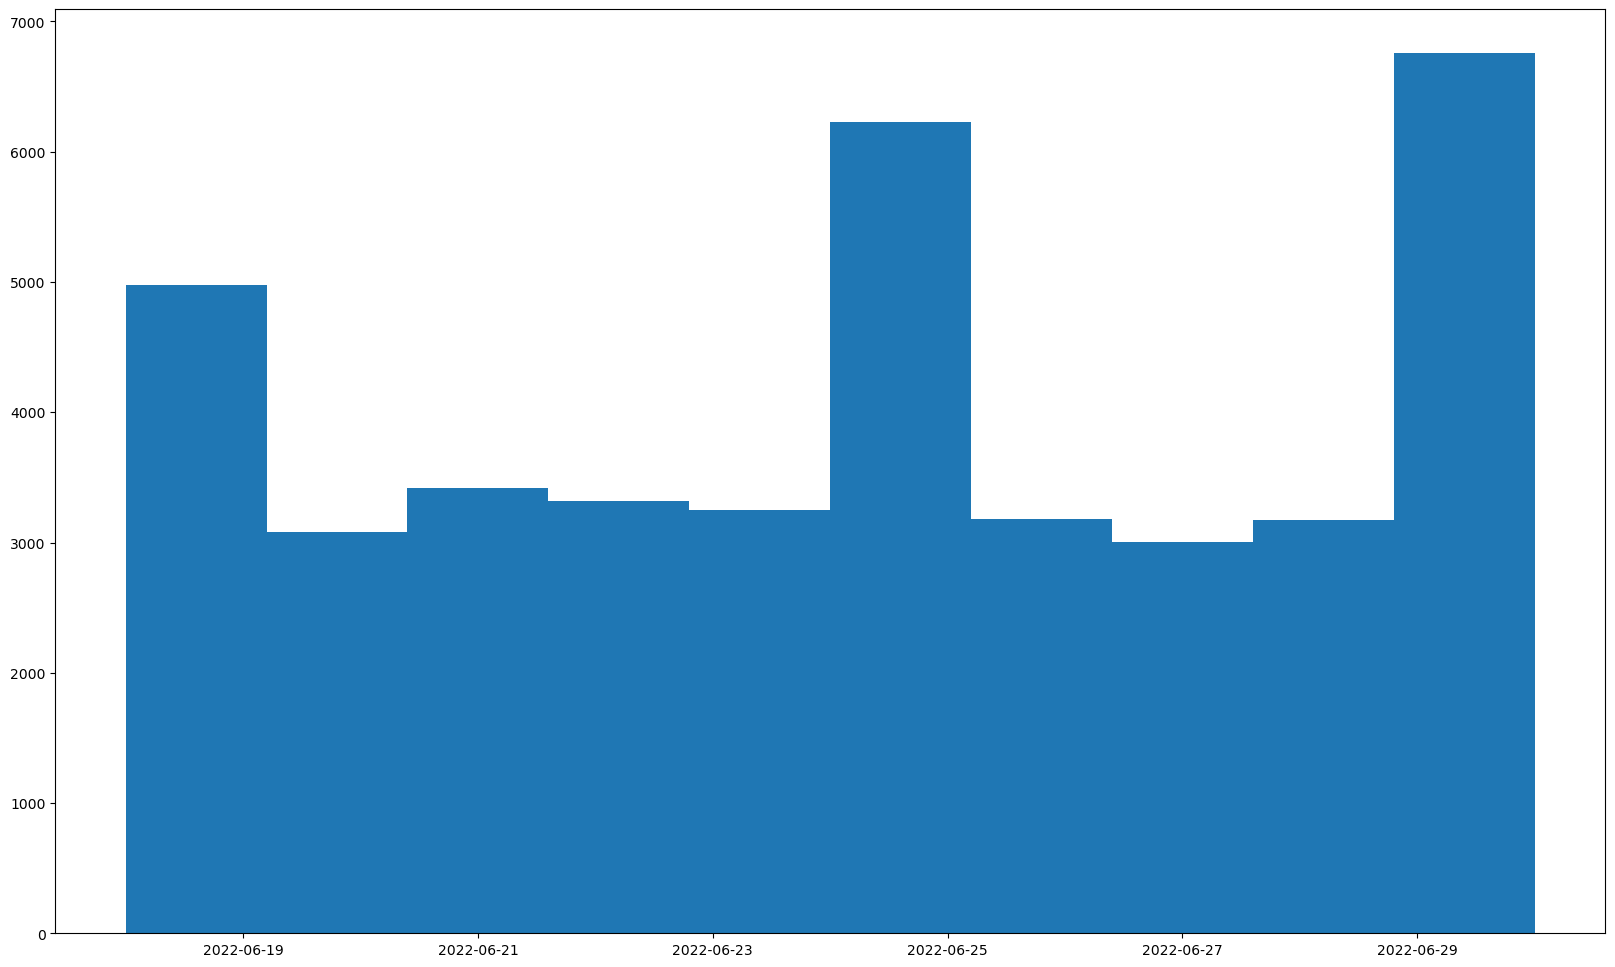

In [19]:
plt.figure(figsize=(20,12))
# plt.bar(df1['Date'],df1.index)
plt.hist(df1['Date'],range=['2022-06-18','2022-06-30'])

# For July

(array([3328., 3329., 3193., 3068., 3162., 3339., 3385., 3338., 3268.,
        3201., 3308., 4266., 3804., 3748., 3619., 3533., 3415., 3391.,
        3275., 3321., 3268., 3584., 3422., 3365., 3265., 3433., 3500.,
        3302., 3478., 3356., 3322.]),
 array([19174.        , 19174.96774194, 19175.93548387, 19176.90322581,
        19177.87096774, 19178.83870968, 19179.80645161, 19180.77419355,
        19181.74193548, 19182.70967742, 19183.67741935, 19184.64516129,
        19185.61290323, 19186.58064516, 19187.5483871 , 19188.51612903,
        19189.48387097, 19190.4516129 , 19191.41935484, 19192.38709677,
        19193.35483871, 19194.32258065, 19195.29032258, 19196.25806452,
        19197.22580645, 19198.19354839, 19199.16129032, 19200.12903226,
        19201.09677419, 19202.06451613, 19203.03225806, 19204.        ]),
 <BarContainer object of 31 artists>)

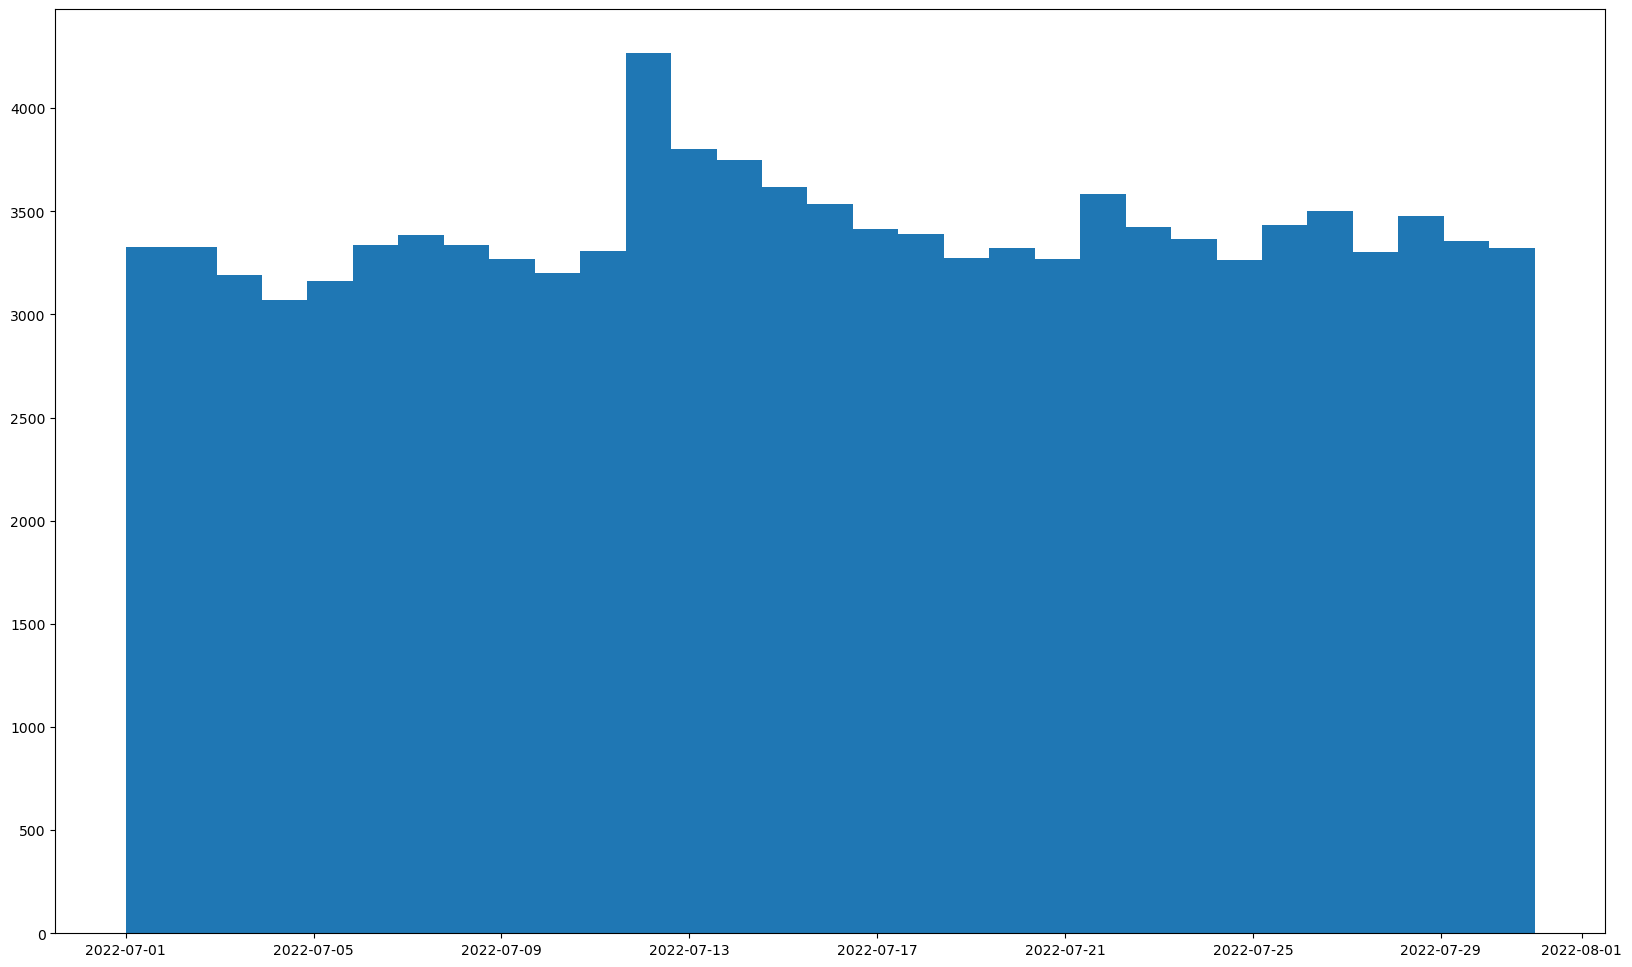

In [20]:
plt.figure(figsize=(20,12))
# plt.bar(df1['Date'],df1.index)
plt.hist(df1['Date'],range=['2022-07-01','2022-07-31'],bins=31)

# For August

(array([3356., 3654., 3250., 3045., 3279., 3071., 2941., 3257., 3018.,
        2917., 2891., 2936., 2932., 3351., 3384., 2539., 2646., 2743.,
        2915., 2968., 2879., 2748., 2769., 2864., 2627., 2811., 2818.,
        2908., 2779., 2803., 5264.]),
 array([19205.        , 19205.96774194, 19206.93548387, 19207.90322581,
        19208.87096774, 19209.83870968, 19210.80645161, 19211.77419355,
        19212.74193548, 19213.70967742, 19214.67741935, 19215.64516129,
        19216.61290323, 19217.58064516, 19218.5483871 , 19219.51612903,
        19220.48387097, 19221.4516129 , 19222.41935484, 19223.38709677,
        19224.35483871, 19225.32258065, 19226.29032258, 19227.25806452,
        19228.22580645, 19229.19354839, 19230.16129032, 19231.12903226,
        19232.09677419, 19233.06451613, 19234.03225806, 19235.        ]),
 <BarContainer object of 31 artists>)

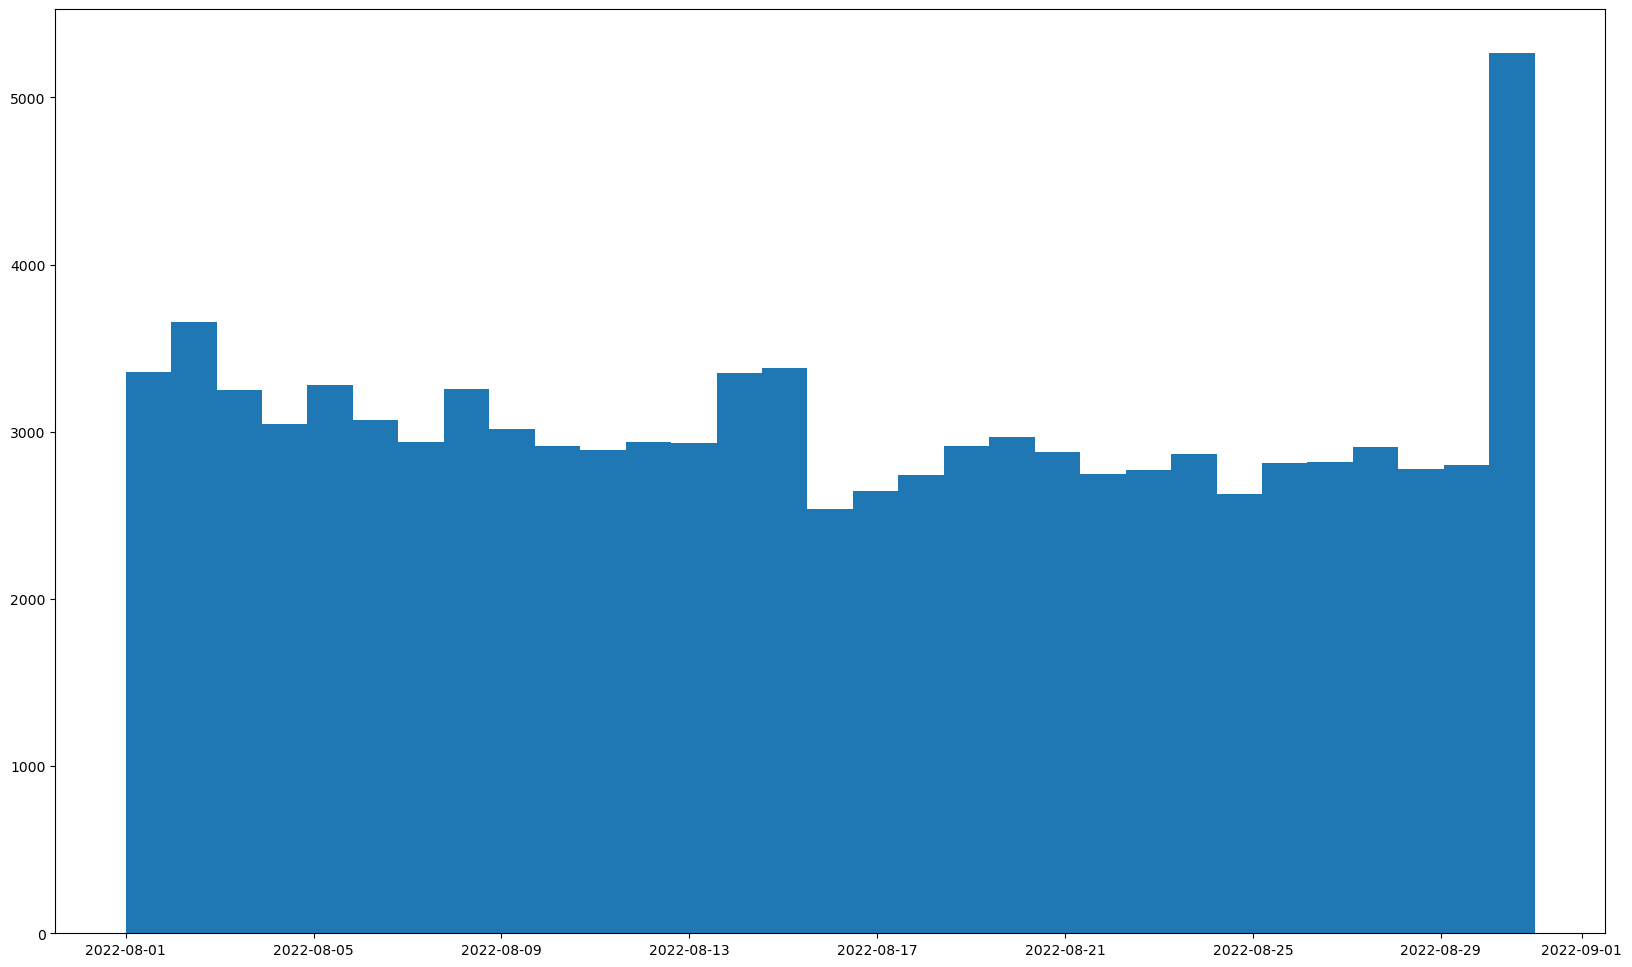

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
# plt.bar(df1['Date'],df1.index)
plt.hist(df1['Date'],range=['2022-08-01','2022-08-31'],bins=31)

# For September

(array([3904., 4086., 3600., 3215., 2982., 2772., 2692., 2636., 2671.,
        2616., 2701., 2612., 2417., 2401., 2435., 2507., 2792., 2996.,
        2375., 2319., 2304., 2271., 2232., 2358., 2445., 2221., 2262.,
        2067., 2116., 2223.]),
 array([19236.        , 19236.96666667, 19237.93333333, 19238.9       ,
        19239.86666667, 19240.83333333, 19241.8       , 19242.76666667,
        19243.73333333, 19244.7       , 19245.66666667, 19246.63333333,
        19247.6       , 19248.56666667, 19249.53333333, 19250.5       ,
        19251.46666667, 19252.43333333, 19253.4       , 19254.36666667,
        19255.33333333, 19256.3       , 19257.26666667, 19258.23333333,
        19259.2       , 19260.16666667, 19261.13333333, 19262.1       ,
        19263.06666667, 19264.03333333, 19265.        ]),
 <BarContainer object of 30 artists>)

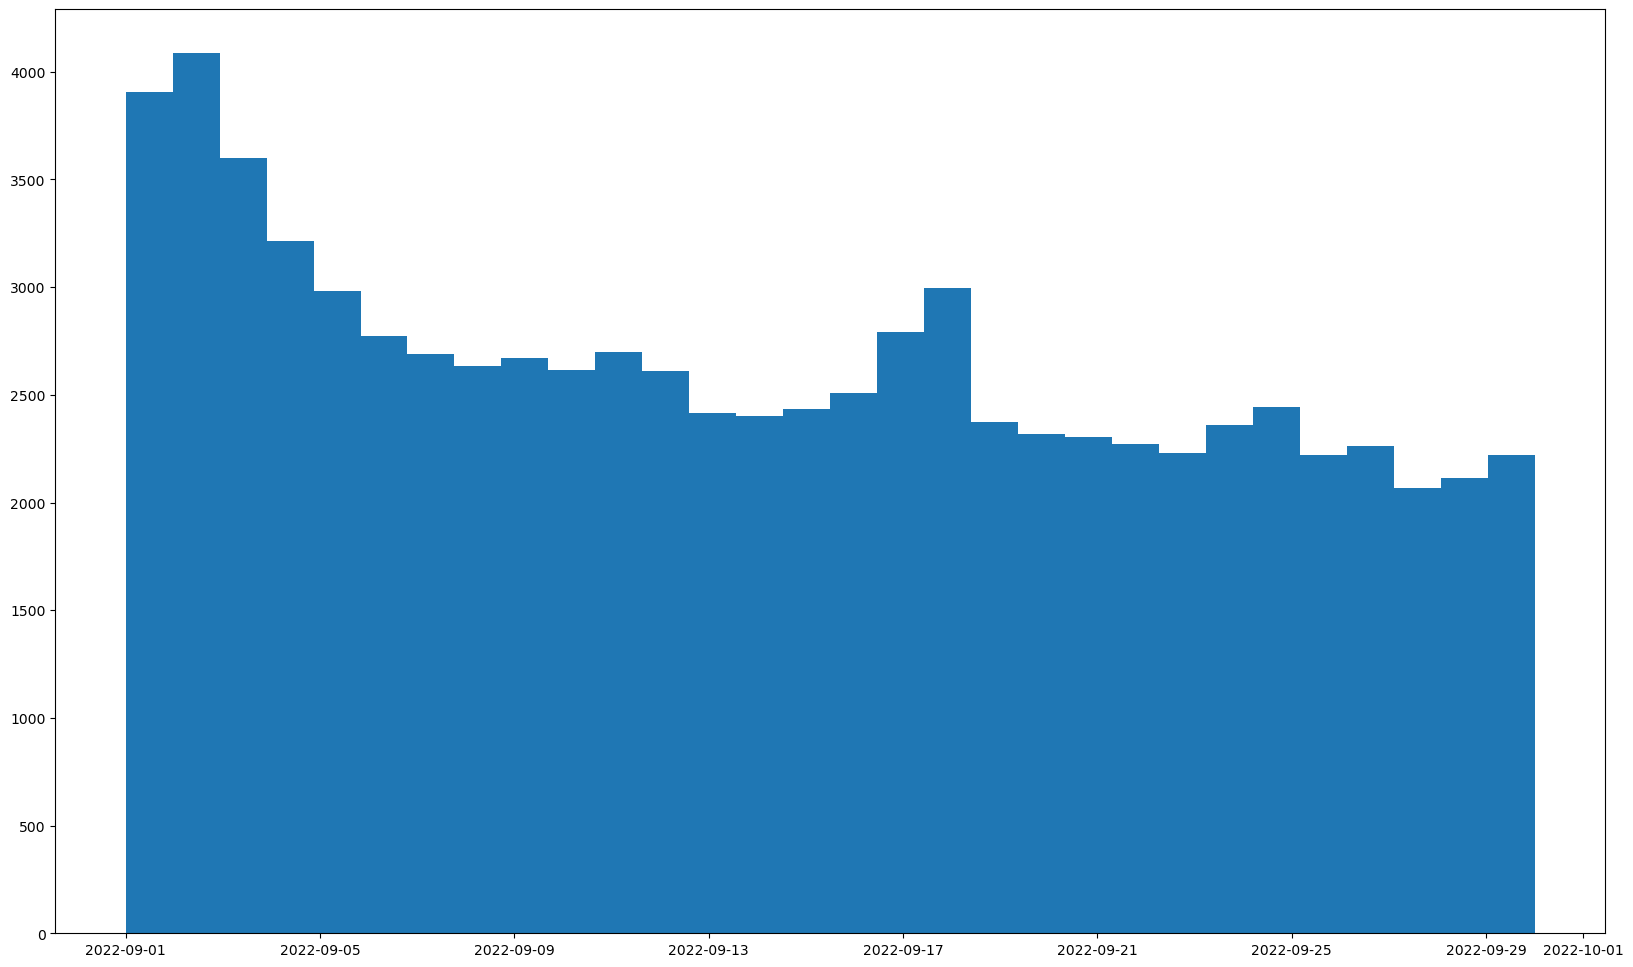

In [22]:
plt.figure(figsize=(20,12))
# plt.bar(df1['Date'],df1.index)
plt.hist(df1['Date'],range=['2022-09-01','2022-09-30'],bins=30)

# For October

(array([2339., 2469., 2301., 2159., 2216., 2156., 2242., 3115., 2458.,
        2276., 2050., 2136., 2042., 2183., 2260., 2386., 2194., 2043.,
        2043., 2174., 2239., 2231., 2321., 2033., 2184., 2060., 2187.,
        2218., 2456., 2484., 2176.]),
 array([19266.        , 19266.96774194, 19267.93548387, 19268.90322581,
        19269.87096774, 19270.83870968, 19271.80645161, 19272.77419355,
        19273.74193548, 19274.70967742, 19275.67741935, 19276.64516129,
        19277.61290323, 19278.58064516, 19279.5483871 , 19280.51612903,
        19281.48387097, 19282.4516129 , 19283.41935484, 19284.38709677,
        19285.35483871, 19286.32258065, 19287.29032258, 19288.25806452,
        19289.22580645, 19290.19354839, 19291.16129032, 19292.12903226,
        19293.09677419, 19294.06451613, 19295.03225806, 19296.        ]),
 [<matplotlib.patches.Polygon at 0x78c4bf2db2b0>])

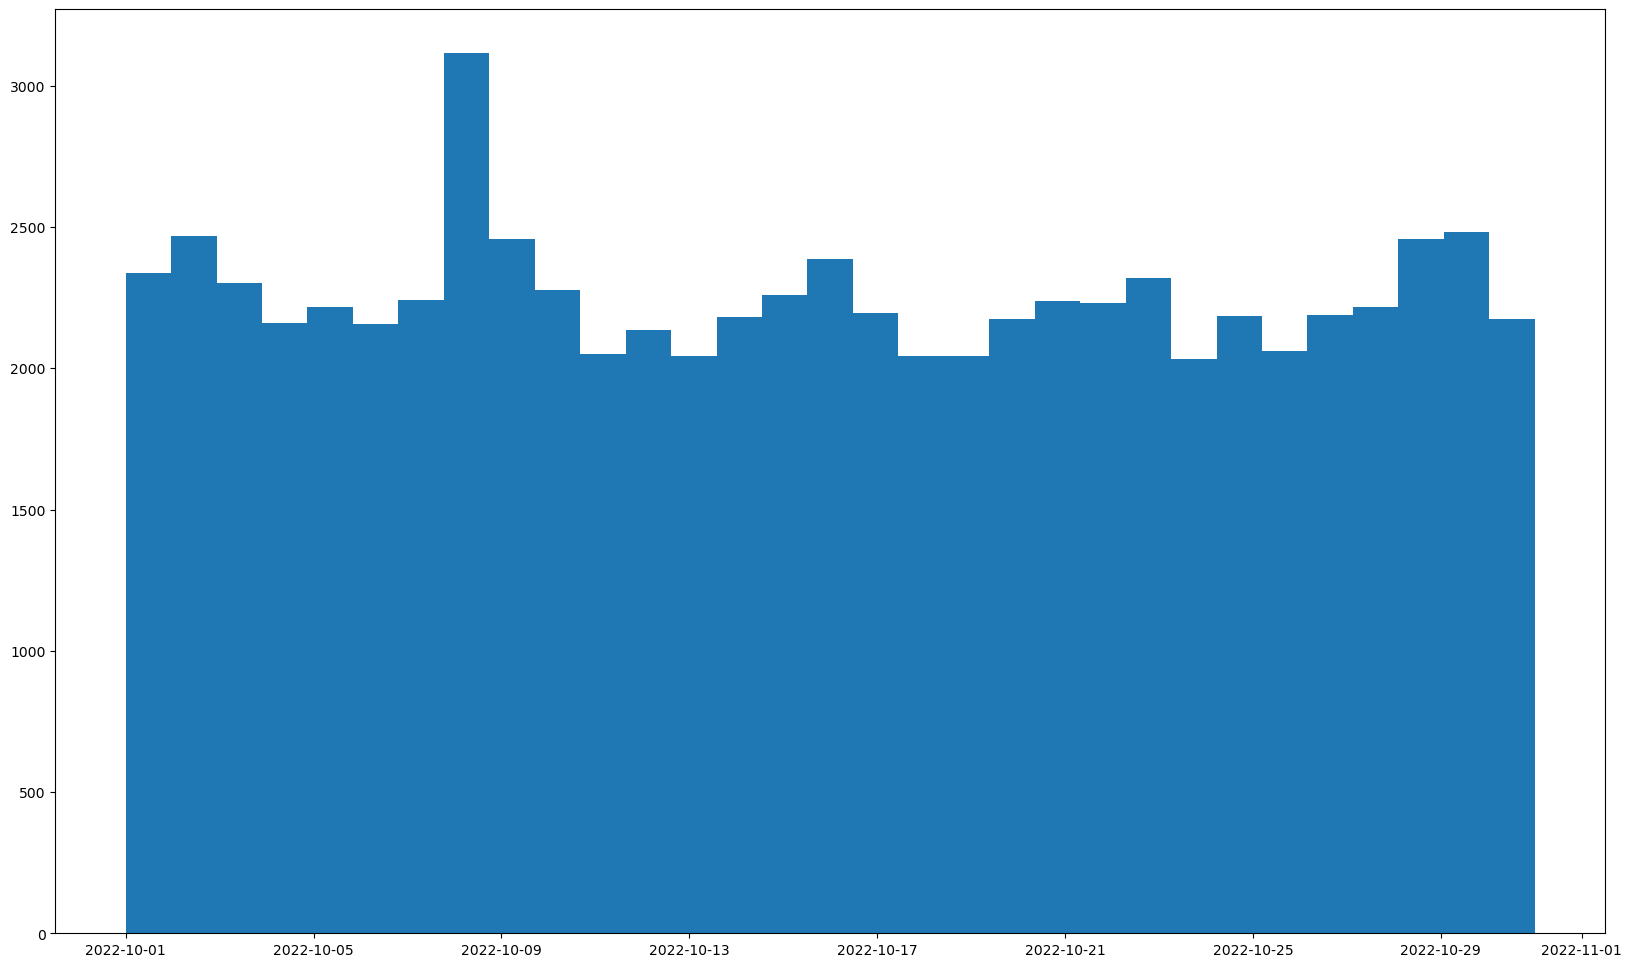

In [23]:
plt.figure(figsize=(20,12))
# plt.bar(df1['Date'],df1.index)
plt.hist(df1['Date'],range=['2022-10-01','2022-10-31'],bins=31,histtype='stepfilled')

# For November

(array([2177., 2056., 2132., 2518., 2431., 2396., 2236., 2248., 2275.,
        2215., 2300., 2420., 2419., 2177., 2262., 2199., 2084., 2399.,
        3005., 3420., 2667., 2482., 2451., 2856., 2974., 2730., 2589.,
        2450., 2301.]),
 array([19297.        , 19297.96551724, 19298.93103448, 19299.89655172,
        19300.86206897, 19301.82758621, 19302.79310345, 19303.75862069,
        19304.72413793, 19305.68965517, 19306.65517241, 19307.62068966,
        19308.5862069 , 19309.55172414, 19310.51724138, 19311.48275862,
        19312.44827586, 19313.4137931 , 19314.37931034, 19315.34482759,
        19316.31034483, 19317.27586207, 19318.24137931, 19319.20689655,
        19320.17241379, 19321.13793103, 19322.10344828, 19323.06896552,
        19324.03448276, 19325.        ]),
 <BarContainer object of 29 artists>)

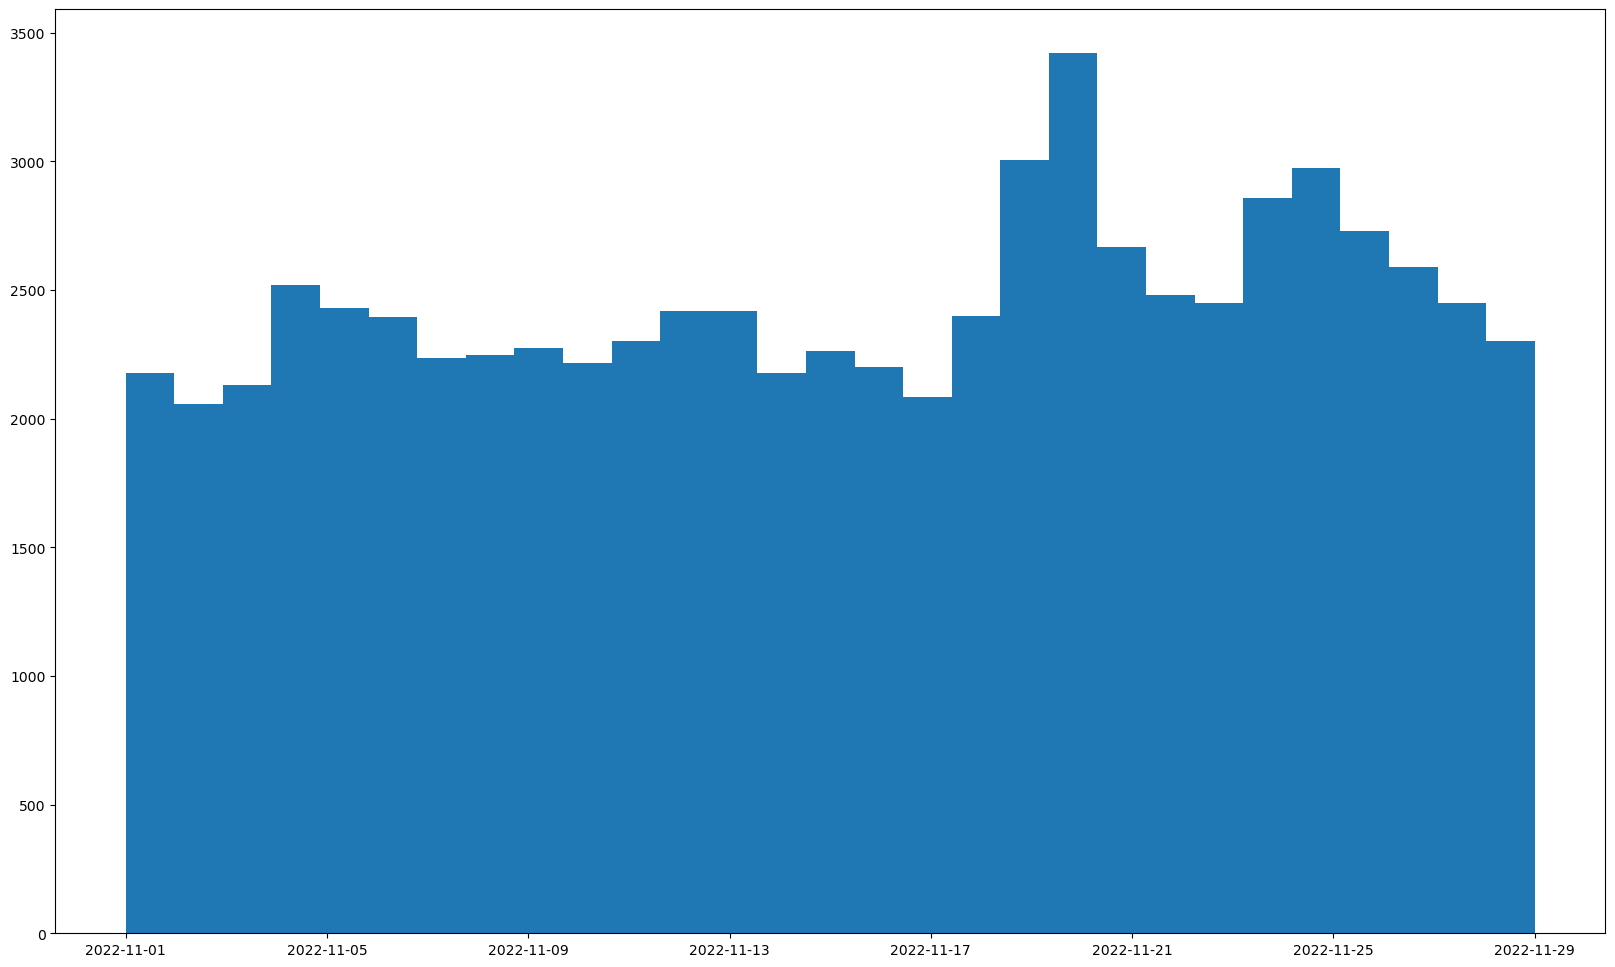

In [24]:
plt.figure(figsize=(20,12))
# plt.bar(df1['Date'],df1.index)
plt.hist(df1['Date'],range=['2022-11-01','2022-11-29'],bins=29)

In [25]:
import seaborn as sns


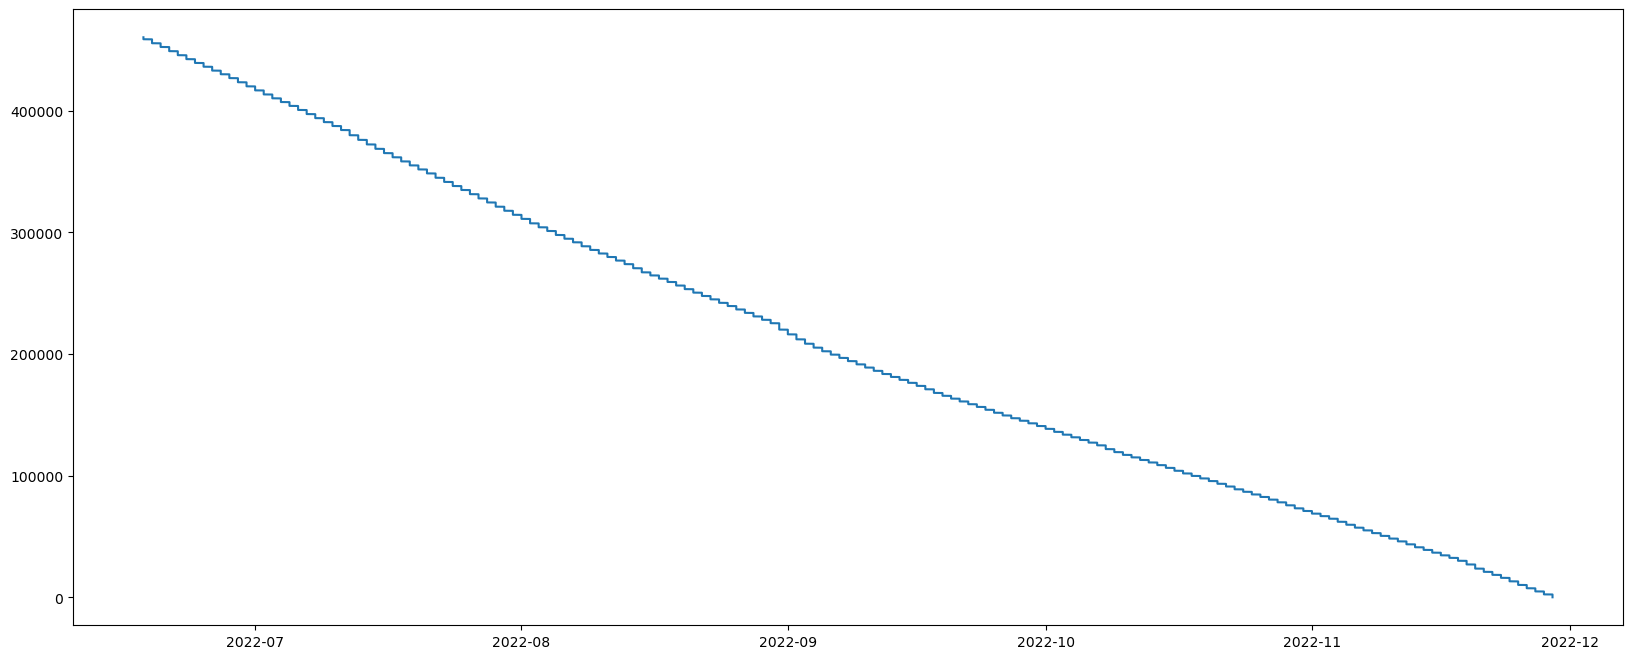

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(df1['Date'],df1.index)